# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import *
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<AxesSubplot:ylabel='Count'>

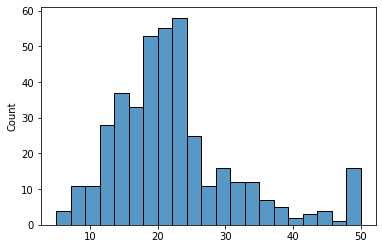

In [41]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape
sns.histplot(y_train)

In [42]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [43]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [44]:
scaler = StandardScaler()

# fit calcule les paramètres de normalisation (moyenne et écart-type)
scaler.fit(X_train)
scaler.fit(X_test)

# transform utilise ces paramètres pour normaliser les données
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(scaler.mean_)

[3.09233578e+00 1.09019608e+01 1.12649020e+01 9.80392157e-02
 5.44155882e-01 6.35415686e+00 6.68490196e+01 4.01198235e+00
 9.98039216e+00 4.17500000e+02 1.83745098e+01 3.64163333e+02
 1.23054902e+01]


❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

chaque y_test doit correspondre à la moyenne des y_train

In [45]:
resultats = []

# 1_la moyenne de y_train
moy_y_train = pd.DataFrame(y_train).mean()

moy_y_train=float(moy_y_train)
# y_test_tolist = list(y_test)

# 2_ comparer tous les y_test à la moyene des y_train

for i in y_test:
    a = abs(i - moy_y_train)
    resultats.append(a)

# # 3 faire la moyenne du résultat 
mae = sum(resultats)/len(resultats)
mae

6.5330421277421875

# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    model= Sequential()
    
    model.add(layers.Dense(10, input_dim = 13 , activation = 'relu'))
    model.add(layers.Dense(7, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'linear'))
               
    return model

# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [74]:
def compile_model(model, optimizer_name):
  
    model.compile(loss='mean_squared_error', metrics=['accuracy','mae','mse'], optimizer= optimizer_name )
    return model

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

def **validation_split** : permet de rediviser les données d'entrainement afin qu'une partie serve à l'entraînement et l'autre à la validation du modèle.

In [75]:
from tensorflow.keras.callbacks import EarlyStopping
# ici, "patience" permet de stopper le modèle quand il ne se modifie plus au delà de epochs
callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

model = initialize_model()
model = compile_model(model, 'adam')

model.fit(X_train, y_train, batch_size=32, epochs=700, callbacks=[callback], validation_split=0.3)
model.summary()

Epoch 1/700
9/9 [==============================] - 1s 25ms/step - loss: 567.0099 - accuracy: 0.0000e+00 - mae: 22.1759 - mse: 567.0099 - val_loss: 655.6031 - val_accuracy: 0.0000e+00 - val_mae: 23.4848 - val_mse: 655.6031
Epoch 2/700
9/9 [==============================] - 0s 6ms/step - loss: 562.3679 - accuracy: 0.0000e+00 - mae: 22.0683 - mse: 562.3679 - val_loss: 650.7626 - val_accuracy: 0.0000e+00 - val_mae: 23.3789 - val_mse: 650.7626
Epoch 3/700
9/9 [==============================] - 0s 5ms/step - loss: 558.1021 - accuracy: 0.0000e+00 - mae: 21.9706 - mse: 558.1021 - val_loss: 646.3715 - val_accuracy: 0.0000e+00 - val_mae: 23.2826 - val_mse: 646.3715
Epoch 4/700
9/9 [==============================] - 0s 6ms/step - loss: 554.0388 - accuracy: 0.0000e+00 - mae: 21.8784 - mse: 554.0388 - val_loss: 642.2145 - val_accuracy: 0.0000e+00 - val_mae: 23.1901 - val_mse: 642.2145
Epoch 5/700
9/9 [==============================] - 0s 7ms/step - loss: 550.1602 - accuracy: 0.0000e+00 - mae: 21.78

Epoch 38/700
9/9 [==============================] - 0s 5ms/step - loss: 234.7757 - accuracy: 0.0000e+00 - mae: 13.1704 - mse: 234.7757 - val_loss: 302.2791 - val_accuracy: 0.0000e+00 - val_mae: 14.5451 - val_mse: 302.2791
Epoch 39/700
9/9 [==============================] - 0s 6ms/step - loss: 221.1410 - accuracy: 0.0000e+00 - mae: 12.7072 - mse: 221.1410 - val_loss: 288.2328 - val_accuracy: 0.0000e+00 - val_mae: 14.1257 - val_mse: 288.2328
Epoch 40/700
9/9 [==============================] - 0s 7ms/step - loss: 207.9789 - accuracy: 0.0000e+00 - mae: 12.2471 - mse: 207.9789 - val_loss: 274.5231 - val_accuracy: 0.0000e+00 - val_mae: 13.6930 - val_mse: 274.5231
Epoch 41/700
9/9 [==============================] - 0s 6ms/step - loss: 195.0357 - accuracy: 0.0000e+00 - mae: 11.7777 - mse: 195.0357 - val_loss: 261.4314 - val_accuracy: 0.0000e+00 - val_mae: 13.2539 - val_mse: 261.4314
Epoch 42/700
9/9 [==============================] - 0s 7ms/step - loss: 182.6665 - accuracy: 0.0000e+00 - mae: 1

9/9 [==============================] - 0s 6ms/step - loss: 34.1928 - accuracy: 0.0000e+00 - mae: 4.2086 - mse: 34.1928 - val_loss: 73.0825 - val_accuracy: 0.0000e+00 - val_mae: 5.9697 - val_mse: 73.0825
Epoch 76/700
9/9 [==============================] - 0s 5ms/step - loss: 33.2216 - accuracy: 0.0000e+00 - mae: 4.1270 - mse: 33.2216 - val_loss: 71.3177 - val_accuracy: 0.0000e+00 - val_mae: 5.8793 - val_mse: 71.3177
Epoch 77/700
9/9 [==============================] - 0s 6ms/step - loss: 32.2120 - accuracy: 0.0000e+00 - mae: 4.0496 - mse: 32.2120 - val_loss: 69.7880 - val_accuracy: 0.0000e+00 - val_mae: 5.7962 - val_mse: 69.7880
Epoch 78/700
9/9 [==============================] - 0s 7ms/step - loss: 31.3349 - accuracy: 0.0000e+00 - mae: 3.9789 - mse: 31.3349 - val_loss: 68.1876 - val_accuracy: 0.0000e+00 - val_mae: 5.7261 - val_mse: 68.1876
Epoch 79/700
9/9 [==============================] - 0s 6ms/step - loss: 30.5183 - accuracy: 0.0000e+00 - mae: 3.9138 - mse: 30.5183 - val_loss: 66.68

Epoch 113/700
9/9 [==============================] - 0s 5ms/step - loss: 18.5937 - accuracy: 0.0000e+00 - mae: 3.0032 - mse: 18.5937 - val_loss: 41.5368 - val_accuracy: 0.0000e+00 - val_mae: 4.2980 - val_mse: 41.5368
Epoch 114/700
9/9 [==============================] - 0s 4ms/step - loss: 18.4536 - accuracy: 0.0000e+00 - mae: 2.9926 - mse: 18.4536 - val_loss: 41.1175 - val_accuracy: 0.0000e+00 - val_mae: 4.2760 - val_mse: 41.1175
Epoch 115/700
9/9 [==============================] - 0s 5ms/step - loss: 18.2894 - accuracy: 0.0000e+00 - mae: 2.9786 - mse: 18.2894 - val_loss: 40.8215 - val_accuracy: 0.0000e+00 - val_mae: 4.2498 - val_mse: 40.8215
Epoch 116/700
9/9 [==============================] - 0s 6ms/step - loss: 18.1438 - accuracy: 0.0000e+00 - mae: 2.9685 - mse: 18.1438 - val_loss: 40.5281 - val_accuracy: 0.0000e+00 - val_mae: 4.2316 - val_mse: 40.5281
Epoch 117/700
9/9 [==============================] - 0s 5ms/step - loss: 18.0031 - accuracy: 0.0000e+00 - mae: 2.9580 - mse: 18.0031

Epoch 151/700
9/9 [==============================] - 0s 5ms/step - loss: 14.2437 - accuracy: 0.0000e+00 - mae: 2.6338 - mse: 14.2437 - val_loss: 32.7008 - val_accuracy: 0.0000e+00 - val_mae: 3.7255 - val_mse: 32.7008
Epoch 152/700
9/9 [==============================] - 0s 4ms/step - loss: 14.1678 - accuracy: 0.0000e+00 - mae: 2.6316 - mse: 14.1678 - val_loss: 32.5820 - val_accuracy: 0.0000e+00 - val_mae: 3.7106 - val_mse: 32.5820
Epoch 153/700
9/9 [==============================] - 0s 5ms/step - loss: 14.0900 - accuracy: 0.0000e+00 - mae: 2.6260 - mse: 14.0900 - val_loss: 32.2113 - val_accuracy: 0.0000e+00 - val_mae: 3.7045 - val_mse: 32.2113
Epoch 154/700
9/9 [==============================] - 0s 6ms/step - loss: 13.9754 - accuracy: 0.0000e+00 - mae: 2.6202 - mse: 13.9754 - val_loss: 32.0705 - val_accuracy: 0.0000e+00 - val_mae: 3.6922 - val_mse: 32.0705
Epoch 155/700
9/9 [==============================] - 0s 5ms/step - loss: 13.8843 - accuracy: 0.0000e+00 - mae: 2.6119 - mse: 13.8843

Epoch 189/700
9/9 [==============================] - 0s 8ms/step - loss: 11.3040 - accuracy: 0.0000e+00 - mae: 2.3600 - mse: 11.3040 - val_loss: 27.3329 - val_accuracy: 0.0000e+00 - val_mae: 3.4492 - val_mse: 27.3329
Epoch 190/700
9/9 [==============================] - 0s 5ms/step - loss: 11.2626 - accuracy: 0.0000e+00 - mae: 2.3606 - mse: 11.2626 - val_loss: 27.1867 - val_accuracy: 0.0000e+00 - val_mae: 3.4460 - val_mse: 27.1867
Epoch 191/700
9/9 [==============================] - 0s 4ms/step - loss: 11.1997 - accuracy: 0.0000e+00 - mae: 2.3536 - mse: 11.1997 - val_loss: 26.9867 - val_accuracy: 0.0000e+00 - val_mae: 3.4341 - val_mse: 26.9867
Epoch 192/700
9/9 [==============================] - 0s 5ms/step - loss: 11.1267 - accuracy: 0.0000e+00 - mae: 2.3508 - mse: 11.1267 - val_loss: 26.8218 - val_accuracy: 0.0000e+00 - val_mae: 3.4282 - val_mse: 26.8218
Epoch 193/700
9/9 [==============================] - 0s 6ms/step - loss: 11.0778 - accuracy: 0.0000e+00 - mae: 2.3538 - mse: 11.0778

Epoch 227/700
9/9 [==============================] - 0s 4ms/step - loss: 9.6079 - accuracy: 0.0000e+00 - mae: 2.2191 - mse: 9.6079 - val_loss: 23.5308 - val_accuracy: 0.0000e+00 - val_mae: 3.2516 - val_mse: 23.5308
Epoch 228/700
9/9 [==============================] - 0s 5ms/step - loss: 9.6000 - accuracy: 0.0000e+00 - mae: 2.2173 - mse: 9.6000 - val_loss: 23.5629 - val_accuracy: 0.0000e+00 - val_mae: 3.2563 - val_mse: 23.5629
Epoch 229/700
9/9 [==============================] - 0s 6ms/step - loss: 9.5312 - accuracy: 0.0000e+00 - mae: 2.2068 - mse: 9.5312 - val_loss: 23.4434 - val_accuracy: 0.0000e+00 - val_mae: 3.2474 - val_mse: 23.4434
Epoch 230/700
9/9 [==============================] - 0s 5ms/step - loss: 9.5250 - accuracy: 0.0000e+00 - mae: 2.2167 - mse: 9.5250 - val_loss: 23.3535 - val_accuracy: 0.0000e+00 - val_mae: 3.2375 - val_mse: 23.3535
Epoch 231/700
9/9 [==============================] - 0s 6ms/step - loss: 9.4619 - accuracy: 0.0000e+00 - mae: 2.2075 - mse: 9.4619 - val_los

9/9 [==============================] - 0s 6ms/step - loss: 8.5624 - accuracy: 0.0000e+00 - mae: 2.1118 - mse: 8.5624 - val_loss: 21.3822 - val_accuracy: 0.0000e+00 - val_mae: 3.1391 - val_mse: 21.3822
Epoch 266/700
9/9 [==============================] - 0s 5ms/step - loss: 8.5475 - accuracy: 0.0000e+00 - mae: 2.1103 - mse: 8.5475 - val_loss: 21.3386 - val_accuracy: 0.0000e+00 - val_mae: 3.1374 - val_mse: 21.3386
Epoch 267/700
9/9 [==============================] - 0s 6ms/step - loss: 8.5193 - accuracy: 0.0000e+00 - mae: 2.1072 - mse: 8.5193 - val_loss: 21.2881 - val_accuracy: 0.0000e+00 - val_mae: 3.1353 - val_mse: 21.2881
Epoch 268/700
9/9 [==============================] - 0s 5ms/step - loss: 8.5142 - accuracy: 0.0000e+00 - mae: 2.1095 - mse: 8.5142 - val_loss: 21.2117 - val_accuracy: 0.0000e+00 - val_mae: 3.1306 - val_mse: 21.2117
Epoch 269/700
9/9 [==============================] - 0s 6ms/step - loss: 8.4807 - accuracy: 0.0000e+00 - mae: 2.1069 - mse: 8.4807 - val_loss: 21.2237 - v

9/9 [==============================] - 0s 6ms/step - loss: 7.9028 - accuracy: 0.0000e+00 - mae: 2.0418 - mse: 7.9028 - val_loss: 20.0960 - val_accuracy: 0.0000e+00 - val_mae: 3.0435 - val_mse: 20.0960
Epoch 304/700
9/9 [==============================] - 0s 6ms/step - loss: 7.9042 - accuracy: 0.0000e+00 - mae: 2.0368 - mse: 7.9042 - val_loss: 20.1682 - val_accuracy: 0.0000e+00 - val_mae: 3.0498 - val_mse: 20.1682
Epoch 305/700
9/9 [==============================] - 0s 5ms/step - loss: 7.8886 - accuracy: 0.0000e+00 - mae: 2.0389 - mse: 7.8886 - val_loss: 20.0066 - val_accuracy: 0.0000e+00 - val_mae: 3.0332 - val_mse: 20.0066
Epoch 306/700
9/9 [==============================] - 0s 4ms/step - loss: 7.8599 - accuracy: 0.0000e+00 - mae: 2.0434 - mse: 7.8599 - val_loss: 19.9881 - val_accuracy: 0.0000e+00 - val_mae: 3.0372 - val_mse: 19.9881
Epoch 307/700
9/9 [==============================] - 0s 5ms/step - loss: 7.8581 - accuracy: 0.0000e+00 - mae: 2.0440 - mse: 7.8581 - val_loss: 19.9976 - v

9/9 [==============================] - 0s 5ms/step - loss: 7.4415 - accuracy: 0.0000e+00 - mae: 1.9834 - mse: 7.4415 - val_loss: 19.4302 - val_accuracy: 0.0000e+00 - val_mae: 2.9821 - val_mse: 19.4302
Epoch 342/700
9/9 [==============================] - 0s 6ms/step - loss: 7.4323 - accuracy: 0.0000e+00 - mae: 1.9841 - mse: 7.4323 - val_loss: 19.4436 - val_accuracy: 0.0000e+00 - val_mae: 2.9868 - val_mse: 19.4436
Epoch 343/700
9/9 [==============================] - 0s 5ms/step - loss: 7.4109 - accuracy: 0.0000e+00 - mae: 1.9812 - mse: 7.4109 - val_loss: 19.3897 - val_accuracy: 0.0000e+00 - val_mae: 2.9822 - val_mse: 19.3897
Epoch 344/700
9/9 [==============================] - 0s 4ms/step - loss: 7.4000 - accuracy: 0.0000e+00 - mae: 1.9807 - mse: 7.4000 - val_loss: 19.3507 - val_accuracy: 0.0000e+00 - val_mae: 2.9756 - val_mse: 19.3507
Epoch 345/700
9/9 [==============================] - 0s 5ms/step - loss: 7.4036 - accuracy: 0.0000e+00 - mae: 1.9827 - mse: 7.4036 - val_loss: 19.3191 - v

9/9 [==============================] - 0s 6ms/step - loss: 7.0847 - accuracy: 0.0000e+00 - mae: 1.9451 - mse: 7.0847 - val_loss: 18.9208 - val_accuracy: 0.0000e+00 - val_mae: 2.9331 - val_mse: 18.9208
Epoch 380/700
9/9 [==============================] - 0s 6ms/step - loss: 7.0769 - accuracy: 0.0000e+00 - mae: 1.9400 - mse: 7.0769 - val_loss: 18.9967 - val_accuracy: 0.0000e+00 - val_mae: 2.9398 - val_mse: 18.9967
Epoch 381/700
9/9 [==============================] - 0s 4ms/step - loss: 7.0649 - accuracy: 0.0000e+00 - mae: 1.9345 - mse: 7.0649 - val_loss: 18.9825 - val_accuracy: 0.0000e+00 - val_mae: 2.9345 - val_mse: 18.9825
Epoch 382/700
9/9 [==============================] - 0s 5ms/step - loss: 7.0676 - accuracy: 0.0000e+00 - mae: 1.9352 - mse: 7.0676 - val_loss: 18.9278 - val_accuracy: 0.0000e+00 - val_mae: 2.9288 - val_mse: 18.9278
Epoch 383/700
9/9 [==============================] - 0s 4ms/step - loss: 7.0659 - accuracy: 0.0000e+00 - mae: 1.9338 - mse: 7.0659 - val_loss: 18.9472 - v

9/9 [==============================] - 0s 6ms/step - loss: 6.8193 - accuracy: 0.0000e+00 - mae: 1.9042 - mse: 6.8193 - val_loss: 18.6832 - val_accuracy: 0.0000e+00 - val_mae: 2.8959 - val_mse: 18.6832
Epoch 418/700
9/9 [==============================] - 0s 5ms/step - loss: 6.8258 - accuracy: 0.0000e+00 - mae: 1.9027 - mse: 6.8258 - val_loss: 18.7474 - val_accuracy: 0.0000e+00 - val_mae: 2.9017 - val_mse: 18.7474
Epoch 419/700
9/9 [==============================] - 0s 4ms/step - loss: 6.8056 - accuracy: 0.0000e+00 - mae: 1.9047 - mse: 6.8056 - val_loss: 18.6322 - val_accuracy: 0.0000e+00 - val_mae: 2.8921 - val_mse: 18.6322
Epoch 420/700
9/9 [==============================] - 0s 4ms/step - loss: 6.8066 - accuracy: 0.0000e+00 - mae: 1.9092 - mse: 6.8066 - val_loss: 18.6849 - val_accuracy: 0.0000e+00 - val_mae: 2.8993 - val_mse: 18.6849
Epoch 421/700
9/9 [==============================] - 0s 5ms/step - loss: 6.8045 - accuracy: 0.0000e+00 - mae: 1.9079 - mse: 6.8045 - val_loss: 18.6482 - v

9/9 [==============================] - 0s 4ms/step - loss: 6.5523 - accuracy: 0.0000e+00 - mae: 1.8635 - mse: 6.5523 - val_loss: 18.2854 - val_accuracy: 0.0000e+00 - val_mae: 2.8837 - val_mse: 18.2854
Epoch 456/700
9/9 [==============================] - 0s 5ms/step - loss: 6.5517 - accuracy: 0.0000e+00 - mae: 1.8723 - mse: 6.5517 - val_loss: 18.1792 - val_accuracy: 0.0000e+00 - val_mae: 2.8719 - val_mse: 18.1792
Epoch 457/700
9/9 [==============================] - 0s 6ms/step - loss: 6.5212 - accuracy: 0.0000e+00 - mae: 1.8634 - mse: 6.5212 - val_loss: 18.2235 - val_accuracy: 0.0000e+00 - val_mae: 2.8794 - val_mse: 18.2235
Epoch 458/700
9/9 [==============================] - 0s 5ms/step - loss: 6.5157 - accuracy: 0.0000e+00 - mae: 1.8650 - mse: 6.5157 - val_loss: 18.1949 - val_accuracy: 0.0000e+00 - val_mae: 2.8745 - val_mse: 18.1949
Epoch 459/700
9/9 [==============================] - 0s 4ms/step - loss: 6.4986 - accuracy: 0.0000e+00 - mae: 1.8626 - mse: 6.4986 - val_loss: 18.1738 - v

9/9 [==============================] - 0s 6ms/step - loss: 6.2794 - accuracy: 0.0000e+00 - mae: 1.8383 - mse: 6.2794 - val_loss: 17.9536 - val_accuracy: 0.0000e+00 - val_mae: 2.8657 - val_mse: 17.9536
Epoch 494/700
9/9 [==============================] - 0s 5ms/step - loss: 6.2804 - accuracy: 0.0000e+00 - mae: 1.8357 - mse: 6.2804 - val_loss: 17.9845 - val_accuracy: 0.0000e+00 - val_mae: 2.8694 - val_mse: 17.9845
Epoch 495/700
9/9 [==============================] - 0s 6ms/step - loss: 6.2920 - accuracy: 0.0000e+00 - mae: 1.8355 - mse: 6.2920 - val_loss: 17.8999 - val_accuracy: 0.0000e+00 - val_mae: 2.8562 - val_mse: 17.8999
Epoch 496/700
9/9 [==============================] - 0s 5ms/step - loss: 6.2788 - accuracy: 0.0000e+00 - mae: 1.8368 - mse: 6.2788 - val_loss: 17.9572 - val_accuracy: 0.0000e+00 - val_mae: 2.8634 - val_mse: 17.9572
Epoch 497/700
9/9 [==============================] - 0s 6ms/step - loss: 6.2668 - accuracy: 0.0000e+00 - mae: 1.8324 - mse: 6.2668 - val_loss: 17.9365 - v

9/9 [==============================] - 0s 6ms/step - loss: 6.0200 - accuracy: 0.0000e+00 - mae: 1.8013 - mse: 6.0200 - val_loss: 17.7326 - val_accuracy: 0.0000e+00 - val_mae: 2.8503 - val_mse: 17.7326
Epoch 532/700
9/9 [==============================] - 0s 7ms/step - loss: 6.0528 - accuracy: 0.0000e+00 - mae: 1.8071 - mse: 6.0528 - val_loss: 17.7335 - val_accuracy: 0.0000e+00 - val_mae: 2.8488 - val_mse: 17.7335
Epoch 533/700
9/9 [==============================] - 0s 6ms/step - loss: 5.9998 - accuracy: 0.0000e+00 - mae: 1.8009 - mse: 5.9998 - val_loss: 17.6778 - val_accuracy: 0.0000e+00 - val_mae: 2.8468 - val_mse: 17.6778
Epoch 534/700
9/9 [==============================] - 0s 5ms/step - loss: 6.0120 - accuracy: 0.0000e+00 - mae: 1.8028 - mse: 6.0120 - val_loss: 17.7161 - val_accuracy: 0.0000e+00 - val_mae: 2.8542 - val_mse: 17.7161
Epoch 535/700
9/9 [==============================] - 0s 4ms/step - loss: 6.0238 - accuracy: 0.0000e+00 - mae: 1.8044 - mse: 6.0238 - val_loss: 17.7443 - v

9/9 [==============================] - 0s 7ms/step - loss: 5.8475 - accuracy: 0.0000e+00 - mae: 1.7770 - mse: 5.8475 - val_loss: 17.5825 - val_accuracy: 0.0000e+00 - val_mae: 2.8464 - val_mse: 17.5825
Epoch 570/700
9/9 [==============================] - 0s 6ms/step - loss: 5.8078 - accuracy: 0.0000e+00 - mae: 1.7701 - mse: 5.8078 - val_loss: 17.6234 - val_accuracy: 0.0000e+00 - val_mae: 2.8476 - val_mse: 17.6234
Epoch 571/700
9/9 [==============================] - 0s 5ms/step - loss: 5.7956 - accuracy: 0.0000e+00 - mae: 1.7631 - mse: 5.7956 - val_loss: 17.6591 - val_accuracy: 0.0000e+00 - val_mae: 2.8422 - val_mse: 17.6591
Epoch 572/700
9/9 [==============================] - 0s 6ms/step - loss: 5.8215 - accuracy: 0.0000e+00 - mae: 1.7651 - mse: 5.8215 - val_loss: 17.6634 - val_accuracy: 0.0000e+00 - val_mae: 2.8433 - val_mse: 17.6634
Epoch 573/700
9/9 [==============================] - 0s 5ms/step - loss: 5.8015 - accuracy: 0.0000e+00 - mae: 1.7641 - mse: 5.8015 - val_loss: 17.6614 - v

9/9 [==============================] - 0s 6ms/step - loss: 5.6220 - accuracy: 0.0000e+00 - mae: 1.7382 - mse: 5.6220 - val_loss: 17.4566 - val_accuracy: 0.0000e+00 - val_mae: 2.8361 - val_mse: 17.4566
Epoch 608/700
9/9 [==============================] - 0s 6ms/step - loss: 5.6200 - accuracy: 0.0000e+00 - mae: 1.7422 - mse: 5.6200 - val_loss: 17.3962 - val_accuracy: 0.0000e+00 - val_mae: 2.8300 - val_mse: 17.3962
Epoch 609/700
9/9 [==============================] - 0s 5ms/step - loss: 5.6117 - accuracy: 0.0000e+00 - mae: 1.7393 - mse: 5.6117 - val_loss: 17.4245 - val_accuracy: 0.0000e+00 - val_mae: 2.8310 - val_mse: 17.4245
Epoch 610/700
9/9 [==============================] - 0s 6ms/step - loss: 5.6235 - accuracy: 0.0000e+00 - mae: 1.7425 - mse: 5.6235 - val_loss: 17.4393 - val_accuracy: 0.0000e+00 - val_mae: 2.8349 - val_mse: 17.4393
Epoch 611/700
9/9 [==============================] - 0s 6ms/step - loss: 5.6102 - accuracy: 0.0000e+00 - mae: 1.7350 - mse: 5.6102 - val_loss: 17.4642 - v

9/9 [==============================] - 0s 6ms/step - loss: 5.4932 - accuracy: 0.0000e+00 - mae: 1.7209 - mse: 5.4932 - val_loss: 17.4401 - val_accuracy: 0.0000e+00 - val_mae: 2.8347 - val_mse: 17.4401
Epoch 646/700
9/9 [==============================] - 0s 6ms/step - loss: 5.4686 - accuracy: 0.0000e+00 - mae: 1.7159 - mse: 5.4686 - val_loss: 17.3679 - val_accuracy: 0.0000e+00 - val_mae: 2.8226 - val_mse: 17.3679
Epoch 647/700
9/9 [==============================] - 0s 6ms/step - loss: 5.4734 - accuracy: 0.0000e+00 - mae: 1.7249 - mse: 5.4734 - val_loss: 17.2735 - val_accuracy: 0.0000e+00 - val_mae: 2.8196 - val_mse: 17.2735
Epoch 648/700
9/9 [==============================] - 0s 5ms/step - loss: 5.4570 - accuracy: 0.0000e+00 - mae: 1.7190 - mse: 5.4570 - val_loss: 17.3340 - val_accuracy: 0.0000e+00 - val_mae: 2.8234 - val_mse: 17.3340
Epoch 649/700
9/9 [==============================] - 0s 5ms/step - loss: 5.4718 - accuracy: 0.0000e+00 - mae: 1.7176 - mse: 5.4718 - val_loss: 17.3707 - v

9/9 [==============================] - 0s 6ms/step - loss: 5.3544 - accuracy: 0.0000e+00 - mae: 1.7026 - mse: 5.3544 - val_loss: 17.2551 - val_accuracy: 0.0000e+00 - val_mae: 2.8147 - val_mse: 17.2551
Epoch 684/700
9/9 [==============================] - 0s 5ms/step - loss: 5.3823 - accuracy: 0.0000e+00 - mae: 1.7083 - mse: 5.3823 - val_loss: 17.1738 - val_accuracy: 0.0000e+00 - val_mae: 2.8038 - val_mse: 17.1738
Epoch 685/700
9/9 [==============================] - 0s 8ms/step - loss: 5.3679 - accuracy: 0.0000e+00 - mae: 1.7120 - mse: 5.3679 - val_loss: 17.1491 - val_accuracy: 0.0000e+00 - val_mae: 2.8049 - val_mse: 17.1491
Epoch 686/700
9/9 [==============================] - 0s 6ms/step - loss: 5.4147 - accuracy: 0.0000e+00 - mae: 1.7051 - mse: 5.4147 - val_loss: 17.2382 - val_accuracy: 0.0000e+00 - val_mae: 2.8178 - val_mse: 17.2382
Epoch 687/700
9/9 [==============================] - 0s 6ms/step - loss: 5.3479 - accuracy: 0.0000e+00 - mae: 1.7052 - mse: 5.3479 - val_loss: 17.1641 - v

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [76]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 0s/step - loss: 17.5064 - accuracy: 0.0000e+00 - mae: 2.8204 - mse: 17.5064
MAE with the rmsprop optimizer: 0.0000  reached in 16 s after 252 epochs


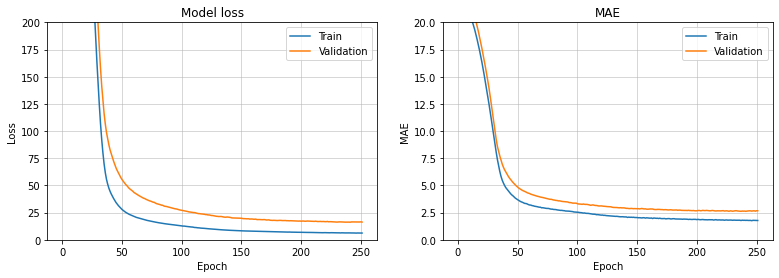

4/4 [==============================] - 0s 0s/step - loss: 19.3072 - accuracy: 0.0000e+00 - mae: 3.0806 - mse: 19.3072
MAE with the adam optimizer: 0.0000  reached in 11 s after 198 epochs


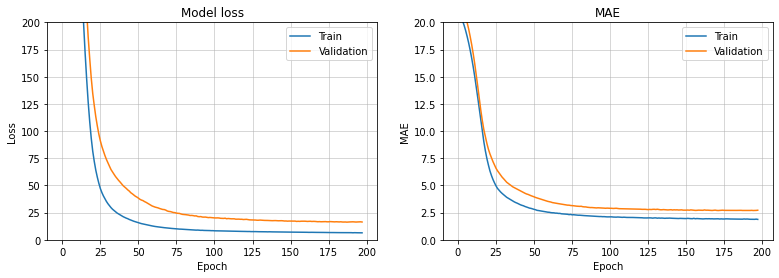

4/4 [==============================] - 0s 5ms/step - loss: 19.7720 - accuracy: 0.0000e+00 - mae: 2.9908 - mse: 19.7720
MAE with the adagrad optimizer: 0.0000  reached in 12 s after 186 epochs


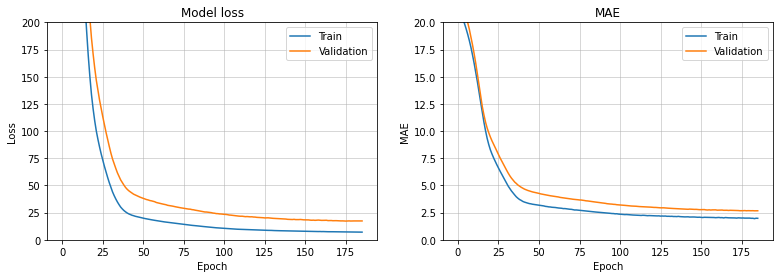

In [73]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    
    es = EarlyStopping(patience=10, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

'rmsprop', 'adam', 'adagrad' sont des paramètres d'optimisation pour mettre à jour les poids des réseaux de neurones.

**RMSprop** : pour les réseaux de neurones récurrents ou pour les modèles qui ont des problèmes de dérive de gradient.

**Adam** : combine les avantages de RMSprop et de la méthode de descente de gradient à pas adaptatif. Il utilise une moyenne mobile pour les gradients et est capable de s'adapter aux différentes tailles de pas pour chaque paramètre.

**Adagrad** : efficace pour les données de grande dimension et pour les modèles à forte densité de paramètres.

**loss** : La loss mesure de la performance du modèle. Elle mesure l'écart entre les prédictions du modèle et les vraies valeurs pour les données d'entraînement. **Plus la valeur de la loss est faible, plus le modèle est précis.** Il existe différentes fonctions de coût, comme la mean squared error (MSE) pour les problèmes de régression, et la cross-entropy pour les problèmes de classification.

**MAE** : a la même unité que la variable à prédire. **Plus elle est élevée, moins le modèle est performant.**

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

Oui, la MAE est moins élevée que celle du benchmark pour les optimizer rmsprop et adam. Mais on voit aussi qu'à partir de 100 epochs le modèle surentrainé. 

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

4/4 [==============================] - 0s 0s/step - loss: 18.3351 - accuracy: 0.0000e+00 - mae: 2.8532 - mse: 18.3351
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B56A0F190> optimizer: 0.0000  reached in 1685 s after 24 epochs


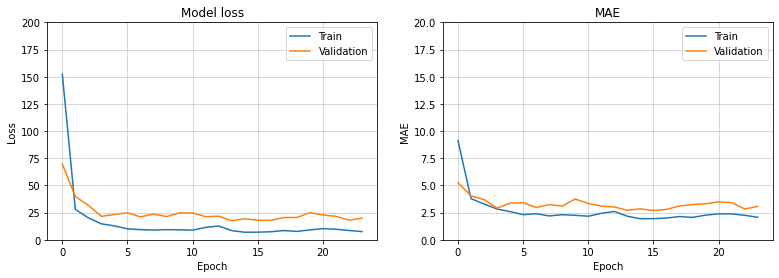

In [93]:
# YOUR CODE HERE
#Look at the documentation of adam and instantiate it with a learning rate of 0.1

from tensorflow.keras import optimizers


#Use this optimizer in the compile_model function
model = initialize_model()
optimizer = optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', metrics=['accuracy','mae','mse'], optimizer=optimizer)

es = EarlyStopping(patience=10, restore_best_weights=True)
# fit the data
history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test)[1]
end_time = time.time()

print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

4/4 [==============================] - 0s 2ms/step - loss: 23.5084 - accuracy: 0.0000e+00 - mae: 3.6484 - mse: 23.5084
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B56A0F190> optimizer: 0.0000  reached in 2587 s after 500 epochs


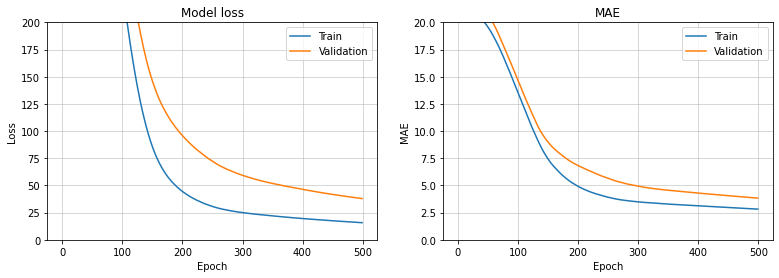

4/4 [==============================] - 0s 0s/step - loss: 24.3767 - accuracy: 0.0000e+00 - mae: 3.0739 - mse: 24.3767
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B56A0F190> optimizer: 0.0000  reached in 2607 s after 340 epochs


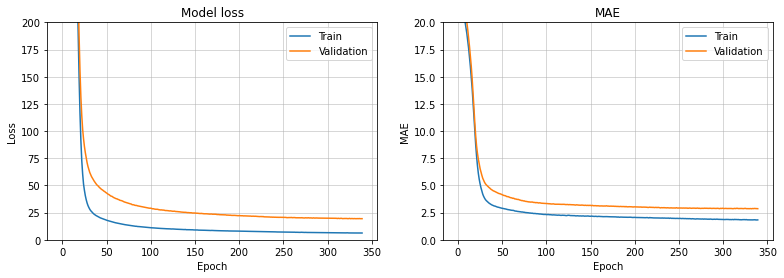

4/4 [==============================] - 0s 0s/step - loss: 24.1686 - accuracy: 0.0000e+00 - mae: 2.7396 - mse: 24.1686
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B56A0F190> optimizer: 0.0000  reached in 2613 s after 89 epochs


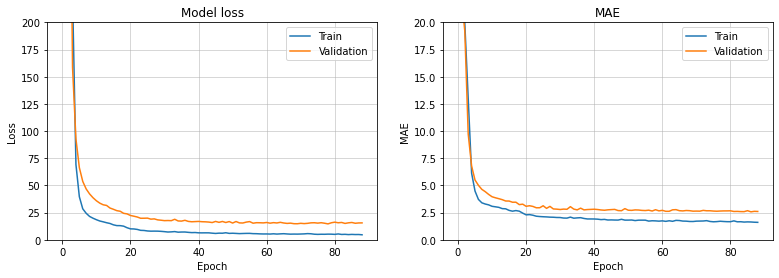

4/4 [==============================] - 0s 2ms/step - loss: 16.2012 - accuracy: 0.0000e+00 - mae: 2.8419 - mse: 16.2012
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B56A0F190> optimizer: 0.0000  reached in 2616 s after 33 epochs


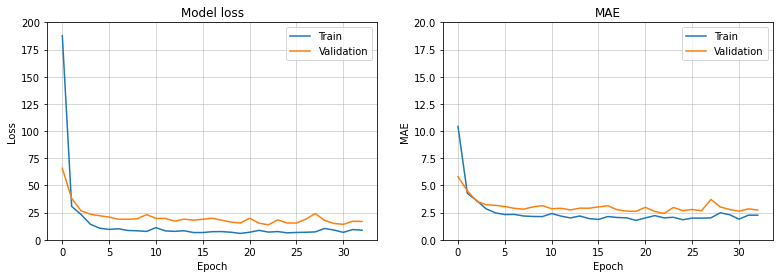

4/4 [==============================] - 0s 5ms/step - loss: 83.5520 - accuracy: 0.0000e+00 - mae: 6.5430 - mse: 83.5520
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B56A0F190> optimizer: 0.0000  reached in 2618 s after 15 epochs


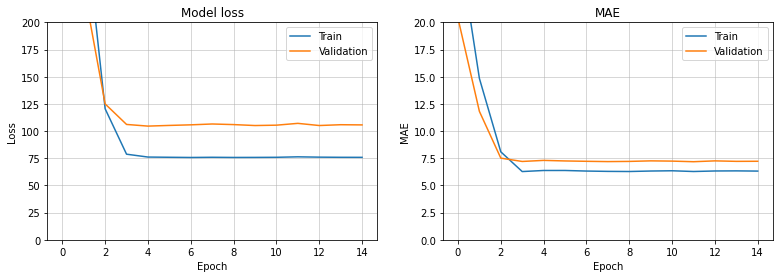

4/4 [==============================] - 0s 5ms/step - loss: 84.1735 - accuracy: 0.0000e+00 - mae: 6.5182 - mse: 84.1735
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B56A0F190> optimizer: 0.0000  reached in 2622 s after 59 epochs


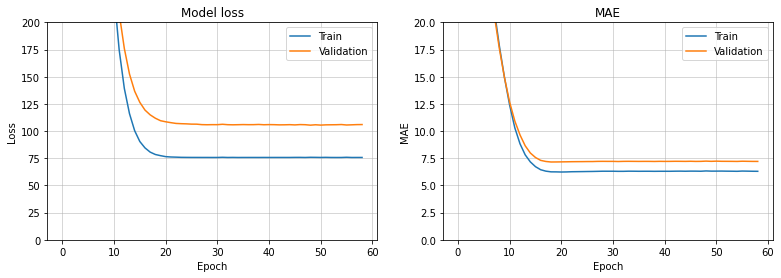

In [102]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    model = initialize_model()
    compile_model(model, Adam(learning_rate = lr))

    es = EarlyStopping(patience=10, restore_best_weights=True)
    # fit the data
    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)


# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

4/4 [==============================] - 0s 2ms/step - loss: 2.8835 - accuracy: 0.0000e+00 - mae: 2.8835 - mse: 23.3878
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B520FB5E0> optimizer: 0.0000  reached in 3916 s after 24 epochs


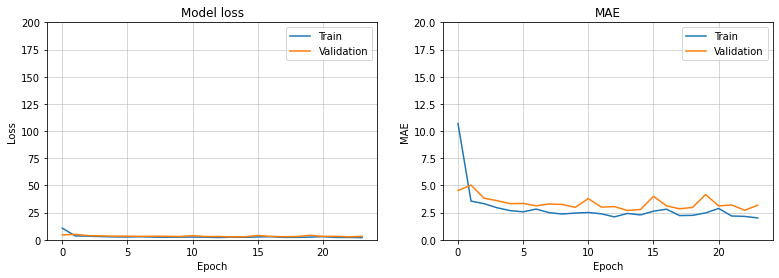

4/4 [==============================] - 0s 2ms/step - loss: 23.0943 - accuracy: 0.0000e+00 - mae: 3.0991 - mse: 23.0943
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000013B45B8CF40> optimizer: 0.0000  reached in 3919 s after 33 epochs


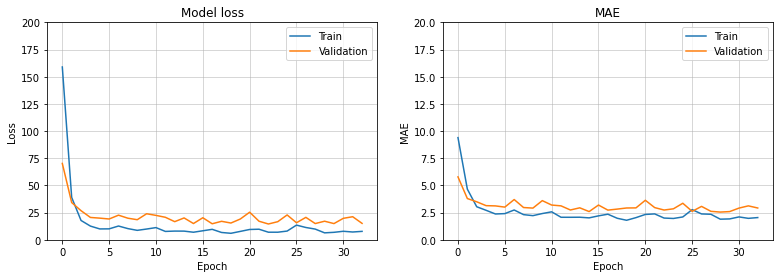

In [113]:
# YOUR CODE HERE

#Use this optimizer in the compile_model function
model = initialize_model()
optimizer = optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_absolute_error', metrics=['accuracy','mae','mse'], optimizer=optimizer)
# mean_squared_error

es = EarlyStopping(patience=10, restore_best_weights=True)
# fit the data
history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test)[1]
end_time = time.time()

print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
plot_loss_mae(history)

model = initialize_model()
optimizer = optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', metrics=['accuracy','mae','mse'], optimizer=optimizer)

es = EarlyStopping(patience=10, restore_best_weights=True)
# fit the data
history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test)[1]
end_time = time.time()

print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
plot_loss_mae(history)



❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [130]:
# YOUR CODE HERE
model.save("mae_test")

INFO:tensorflow:Assets written to: mae_test\assets


INFO:tensorflow:Assets written to: mae_test\assets


# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

In [134]:
models.save_model(model, 'mae_test')

INFO:tensorflow:Assets written to: mae_test\assets


INFO:tensorflow:Assets written to: mae_test\assets


❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [136]:
# YOUR CODE
model = models.load_model('mae_test')
model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 10)                140       
                                                                 
 dense_187 (Dense)           (None, 7)                 77        
                                                                 
 dense_188 (Dense)           (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [ ]:
# YOUR CODE HERE